In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
# Importation of the dataset
import pandas as pd
curve_trx_from_to_path = 'curve_trx_from_to.csv'  
veCRV_20holders_path = 'veCRV_20holders.csv'      
curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)
veCRV_20holders = pd.read_csv(veCRV_20holders_path)


C:\Users\Badr\AppData\Local\Temp\ipykernel_23964\2405887099.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)


In [2]:
# Remove the row where the 'to' variable is missing in curve_trx_from_to dataset
curve_trx_from_to_cleaned = curve_trx_from_to.dropna(subset=['to'])

In [3]:
# Replace missing values in object columns with "Unknown"
object_columns = curve_trx_from_to_cleaned.select_dtypes(include=['object']).columns
curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')

C:\Users\Badr\AppData\Local\Temp\ipykernel_23964\1406052502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


In [4]:
curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')

# Then, set the timeStamp as the index of the DataFrame
curve_trx_from_to_cleaned.set_index('timeStamp', inplace=True)

C:\Users\Badr\AppData\Local\Temp\ipykernel_23964\534350133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')


In [5]:
# Define the veCRV introduction date
veCRV_start_date = pd.to_datetime('2020-10-10')

In [6]:
# Analyze transaction volume
daily_volume_pre_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index < veCRV_start_date]['value'].resample('D').sum()
daily_volume_post_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index >= veCRV_start_date]['value'].resample('D').sum()


In [7]:
# Analyze gas prices
daily_gas_pre_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index < veCRV_start_date]['gasPrice'].resample('D').mean()
daily_gas_post_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index >= veCRV_start_date]['gasPrice'].resample('D').mean()


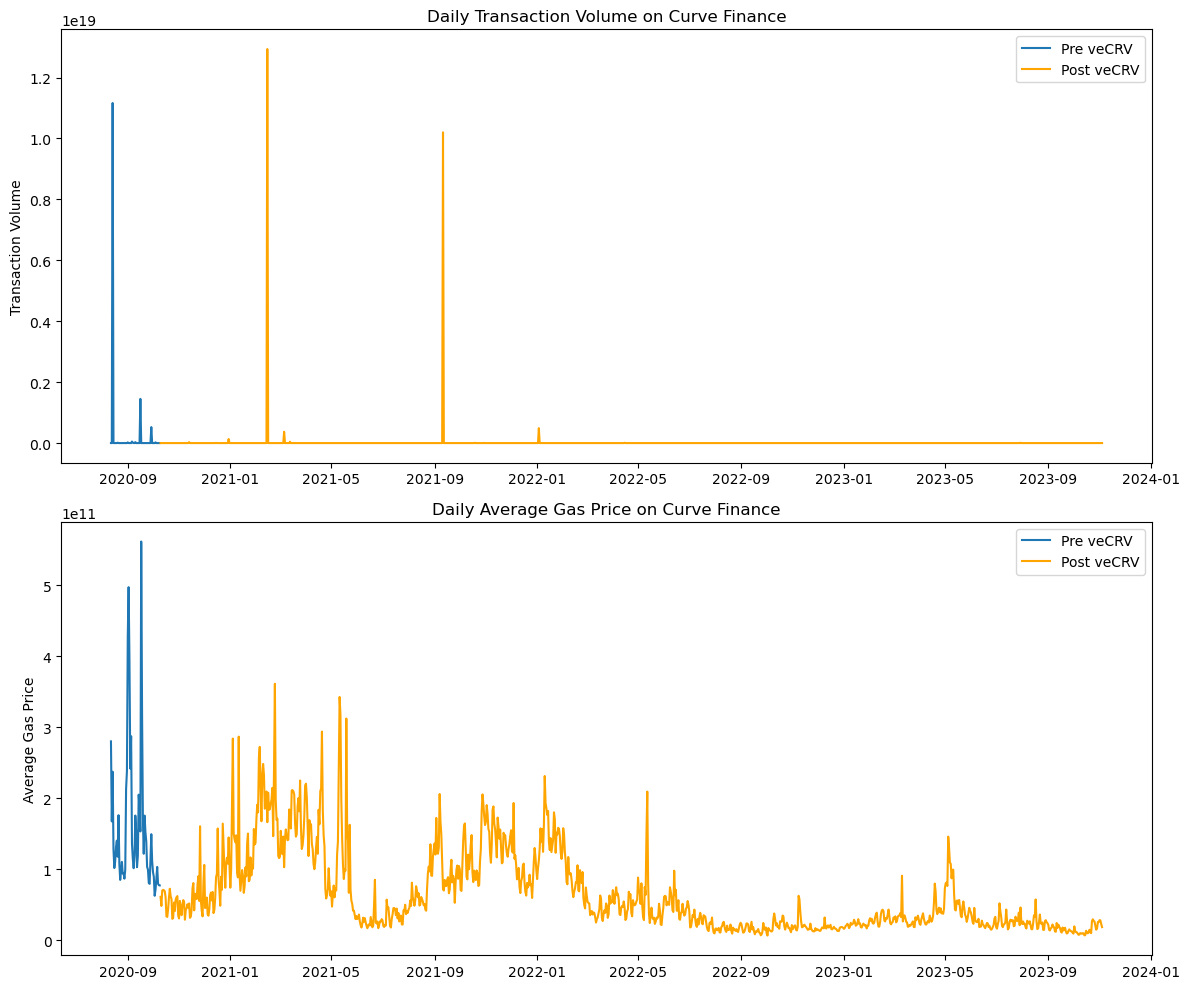

In [10]:
# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot transaction volume
axs[0].plot(daily_volume_pre_veCRV.index, daily_volume_pre_veCRV, label='Pre veCRV')
axs[0].plot(daily_volume_post_veCRV.index, daily_volume_post_veCRV, label='Post veCRV', color='orange')
axs[0].set_title('Daily Transaction Volume on Curve Finance')
axs[0].set_ylabel('Transaction Volume')
axs[0].legend()

# Plot gas prices
axs[1].plot(daily_gas_pre_veCRV.index, daily_gas_pre_veCRV, label='Pre veCRV')
axs[1].plot(daily_gas_post_veCRV.index, daily_gas_post_veCRV, label='Post veCRV', color='orange')
axs[1].set_title('Daily Average Gas Price on Curve Finance')
axs[1].set_ylabel('Average Gas Price')
axs[1].legend()

plt.tight_layout()
plt.show()

In [11]:
# Statistical Analysis
# Compare mean values before and after veCRV introduction
mean_volume_pre_veCRV = daily_volume_pre_veCRV.mean()
mean_volume_post_veCRV = daily_volume_post_veCRV.mean()
mean_gas_pre_veCRV = daily_gas_pre_veCRV.mean()
mean_gas_post_veCRV = daily_gas_post_veCRV.mean()

print(f"Average daily transaction volume pre-veCRV: {mean_volume_pre_veCRV}")
print(f"Average daily transaction volume post-veCRV: {mean_volume_post_veCRV}")
print(f"Average daily gas price pre-veCRV: {mean_gas_pre_veCRV}")
print(f"Average daily gas price post-veCRV: {mean_gas_post_veCRV}")

Average daily transaction volume pre-veCRV: 2.2530044237288134e+17
Average daily transaction volume post-veCRV: 2.1629284344335416e+16
Average daily gas price pre-veCRV: 158430353152.52258
Average daily gas price post-veCRV: 63591787023.29551


In [12]:
# Assuming 'curve_trx_from_to_cleaned' has the columns 'value' for transaction volume, 'from' and 'to' for addresses,
# and that you have already converted 'timeStamp' to a datetime index.

import scipy.stats as stats

# Transaction Count Analysis
daily_transaction_count_pre_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index < veCRV_start_date].resample('D').count()['value']
daily_transaction_count_post_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index >= veCRV_start_date].resample('D').count()['value']

# Active Addresses Analysis
daily_active_addresses_pre_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index < veCRV_start_date][['from', 'to']].resample('D').nunique()
daily_active_addresses_post_veCRV = curve_trx_from_to_cleaned[curve_trx_from_to_cleaned.index >= veCRV_start_date][['from', 'to']].resample('D').nunique()

# Perform a t-test on the mean daily transaction volume
t_test_results_volume = stats.ttest_ind(daily_volume_pre_veCRV, daily_volume_post_veCRV, equal_var=False)

# Perform a t-test on the mean daily gas prices
t_test_results_gas = stats.ttest_ind(daily_gas_pre_veCRV, daily_gas_post_veCRV, equal_var=False)

# Perform a t-test on the mean daily transaction count
t_test_results_transaction_count = stats.ttest_ind(daily_transaction_count_pre_veCRV, daily_transaction_count_post_veCRV, equal_var=False)

# Perform a t-test on the mean daily active addresses
t_test_results_active_addresses = stats.ttest_ind(daily_active_addresses_pre_veCRV.sum(axis=1), daily_active_addresses_post_veCRV.sum(axis=1), equal_var=False)

# Print t-test results
print(f"T-test results for transaction volume: {t_test_results_volume}")
print(f"T-test results for gas prices: {t_test_results_gas}")
print(f"T-test results for transaction count: {t_test_results_transaction_count}")
print(f"T-test results for active addresses: {t_test_results_active_addresses}")


T-test results for transaction volume: Ttest_indResult(statistic=1.0667463762015195, pvalue=0.2904547058412128)
T-test results for gas prices: Ttest_indResult(statistic=6.990611592602283, pvalue=2.62875219484569e-09)
T-test results for transaction count: Ttest_indResult(statistic=5.25225027186255, pvalue=2.1744716571930825e-06)
T-test results for active addresses: Ttest_indResult(statistic=4.845304911571263, pvalue=9.457976500532163e-06)
